# Project Requirements
Analyze and compare the popularity of Marvel versus DC movies among young adults (ages 18-30) by generating a synthetic dataset simulating survey responses, performing demographic analysis (gender, age groups), visualizing the findings, and summarizing key trends.

## Generate Synthetic Dataset

Create a synthetic dataset simulating survey responses from young adults (ages 18-30). The dataset should include columns for 'Age', 'Gender', 'Movie_Preference' (Marvel/DC), and 'Rating' (1-5 for their preferred franchise's movies).


In [1]:
import pandas as pd
import numpy as np

print("Libraries pandas and numpy imported successfully.")

Libraries pandas and numpy imported successfully.


In [2]:
num_responses = 1000

ages = np.random.randint(18, 31, num_responses)
genders = np.random.choice(['Male', 'Female'], num_responses)
movie_preferences = np.random.choice(['Marvel', 'DC'], num_responses)
ratings = np.random.randint(1, 6, num_responses)

survey_data = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Movie_Preference': movie_preferences,
    'Rating': ratings
})

print(f"Synthetic dataset with {num_responses} responses created successfully.")
print("First 5 rows of the dataset:")
print(survey_data.head())

Synthetic dataset with 1000 responses created successfully.
First 5 rows of the dataset:
   Age  Gender Movie_Preference  Rating
0   24  Female           Marvel       2
1   25  Female           Marvel       2
2   26    Male               DC       5
3   29    Male               DC       4
4   20    Male           Marvel       4


## Load and Inspect Data

Load the generated dataset into a pandas DataFrame and display the first few rows, column information, and basic descriptive statistics to understand its structure.


In [3]:
print("Displaying the first 5 rows of the dataset:")
print(survey_data.head())

print("\nDisplaying column information (non-null counts and data types):")
survey_data.info()

print("\nDisplaying descriptive statistics for numerical columns:")
print(survey_data.describe())

Displaying the first 5 rows of the dataset:
   Age  Gender Movie_Preference  Rating
0   24  Female           Marvel       2
1   25  Female           Marvel       2
2   26    Male               DC       5
3   29    Male               DC       4
4   20    Male           Marvel       4

Displaying column information (non-null counts and data types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Gender            1000 non-null   object
 2   Movie_Preference  1000 non-null   object
 3   Rating            1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB

Displaying descriptive statistics for numerical columns:
               Age       Rating
count  1000.000000  1000.000000
mean     23.977000     2.972000
std       3.666867     1.421702
min      18.000000     1.000000
2

## Analyze Overall Popularity

Calculate the overall proportion of young adults preferring Marvel versus DC. Determine the average rating for each franchise.


In [4]:
movie_preference_proportions = survey_data['Movie_Preference'].value_counts(normalize=True)
print("Overall Movie Preference Proportions:")
print(movie_preference_proportions)

average_ratings = survey_data.groupby('Movie_Preference')['Rating'].mean()
print("\nAverage Rating for each Franchise:")
print(average_ratings)


Overall Movie Preference Proportions:
Movie_Preference
Marvel    0.527
DC        0.473
Name: proportion, dtype: float64

Average Rating for each Franchise:
Movie_Preference
DC        2.947146
Marvel    2.994307
Name: Rating, dtype: float64


## Analyze Popularity by Demographics

Analyze movie preference and average ratings broken down by 'Gender' and different 'Age' groups (e.g., 18-21, 22-25, 26-30) within the young adult category.


In [5]:
bins = [17, 21, 25, 30]
labels = ['18-21', '22-25', '26-30']
survey_data['Age_Group'] = pd.cut(survey_data['Age'], bins=bins, labels=labels, right=True)

print("Age_Group column created successfully.")
print("First 5 rows with new Age_Group column:")
print(survey_data.head())

Age_Group column created successfully.
First 5 rows with new Age_Group column:
   Age  Gender Movie_Preference  Rating Age_Group
0   24  Female           Marvel       2     22-25
1   25  Female           Marvel       2     22-25
2   26    Male               DC       5     26-30
3   29    Male               DC       4     26-30
4   20    Male           Marvel       4     18-21


Now that the 'Age_Group' column is created, I will proceed to calculate movie preference proportions and average ratings, first broken down by 'Gender' and then by 'Age_Group', as specified in the subtask instructions.

In [7]:
print("\n--- Analysis by Gender ---")

# Calculate movie preference proportions by Gender
gender_preference_proportions = survey_data.groupby('Gender')['Movie_Preference'].value_counts(normalize=True)
print("\nMovie Preference Proportions by Gender:")
print(gender_preference_proportions)

# Calculate average rating by Gender and Movie_Preference
gender_average_ratings = survey_data.groupby(['Gender', 'Movie_Preference'])['Rating'].mean()
print("\nAverage Rating by Gender and Franchise:")
print(gender_average_ratings)

print("\n--- Analysis by Age Group ---")

# Calculate movie preference proportions by Age_Group
age_group_preference_proportions = survey_data.groupby('Age_Group', observed=False)['Movie_Preference'].value_counts(normalize=True)
print("\nMovie Preference Proportions by Age Group:")
print(age_group_preference_proportions)

# Calculate average rating by Age_Group and Movie_Preference
age_group_average_ratings = survey_data.groupby(['Age_Group', 'Movie_Preference'], observed=False)['Rating'].mean()
print("\nAverage Rating by Age Group and Franchise:")
print(age_group_average_ratings)


--- Analysis by Gender ---

Movie Preference Proportions by Gender:
Gender  Movie_Preference
Female  Marvel              0.509677
        DC                  0.490323
Male    Marvel              0.542056
        DC                  0.457944
Name: proportion, dtype: float64

Average Rating by Gender and Franchise:
Gender  Movie_Preference
Female  DC                  2.833333
        Marvel              2.991561
Male    DC                  3.053061
        Marvel              2.996552
Name: Rating, dtype: float64

--- Analysis by Age Group ---

Movie Preference Proportions by Age Group:
Age_Group  Movie_Preference
18-21      Marvel              0.503268
           DC                  0.496732
22-25      Marvel              0.531847
           DC                  0.468153
26-30      Marvel              0.542105
           DC                  0.457895
Name: proportion, dtype: float64

Average Rating by Age Group and Franchise:
Age_Group  Movie_Preference
18-21      DC                  2.8

## Visualize Popularity

Generate visualizations including a bar chart showing overall Marvel vs. DC preference, and stacked bar charts or grouped bar charts illustrating preferences and average ratings across different gender and age groups.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported successfully.")

Libraries matplotlib.pyplot and seaborn imported successfully.


The first visualization requested is a bar chart showing the overall proportion of Marvel vs. DC preferences.


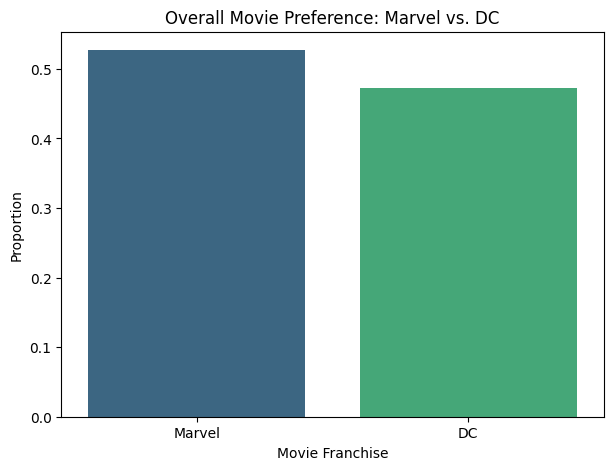

In [10]:
plt.figure(figsize=(7, 5))
sns.barplot(x=movie_preference_proportions.index, y=movie_preference_proportions.values, hue=movie_preference_proportions.index, palette='viridis', legend=False)
plt.title('Overall Movie Preference: Marvel vs. DC')
plt.xlabel('Movie Franchise')
plt.ylabel('Proportion')
plt.show()

The next step is to create a visualization for movie preference proportions by 'Gender'.


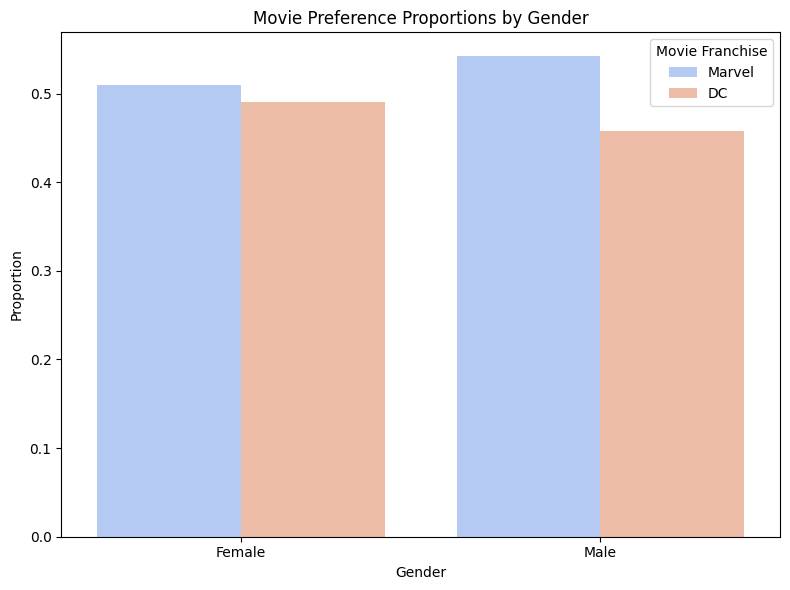

In [11]:
gender_pref_df = gender_preference_proportions.reset_index()
gender_pref_df.columns = ['Gender', 'Movie_Preference', 'Proportion']

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_pref_df, x='Gender', y='Proportion', hue='Movie_Preference', palette='coolwarm')
plt.title('Movie Preference Proportions by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Movie Franchise')
plt.tight_layout()
plt.show()

The next visualization required is a grouped bar chart for average ratings by 'Gender' and 'Movie_Preference'.


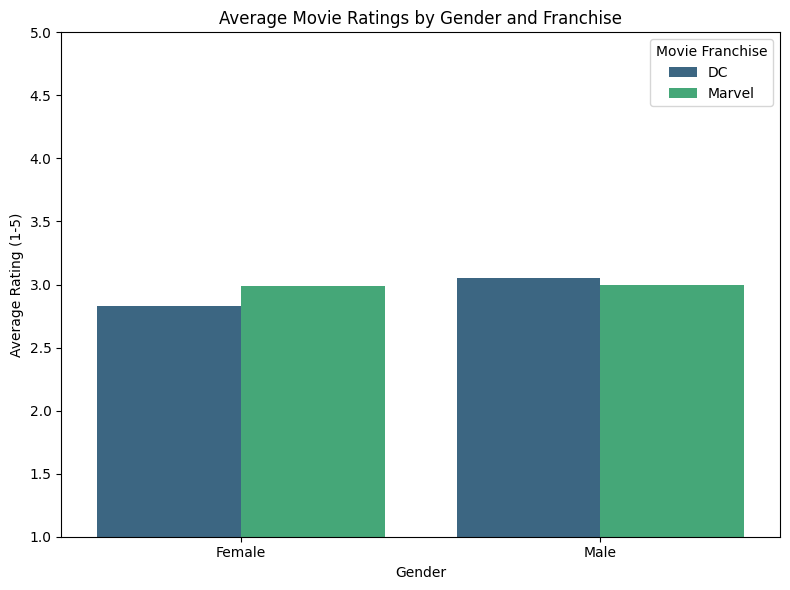

In [12]:
gender_avg_ratings_df = gender_average_ratings.reset_index()
gender_avg_ratings_df.columns = ['Gender', 'Movie_Preference', 'Average_Rating']

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_avg_ratings_df, x='Gender', y='Average_Rating', hue='Movie_Preference', palette='viridis')
plt.title('Average Movie Ratings by Gender and Franchise')
plt.xlabel('Gender')
plt.ylabel('Average Rating (1-5)')
plt.legend(title='Movie Franchise')
plt.ylim(1, 5) # Set y-axis limits to match rating scale
plt.tight_layout()
plt.show()

The next visualization required is a grouped bar chart for movie preference proportions by 'Age_Group'.


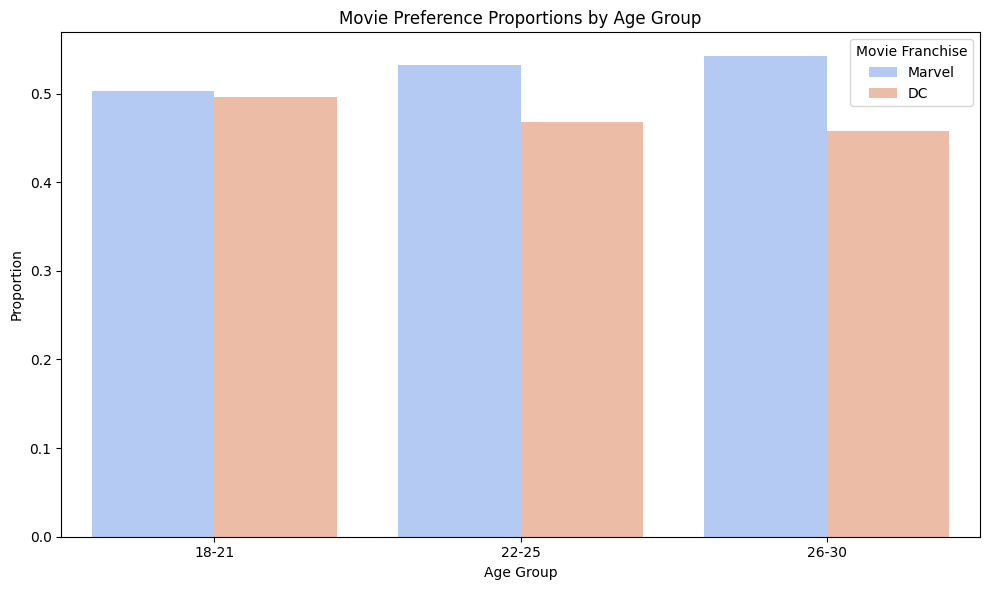

In [13]:
age_group_pref_df = age_group_preference_proportions.reset_index()
age_group_pref_df.columns = ['Age_Group', 'Movie_Preference', 'Proportion']

plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_pref_df, x='Age_Group', y='Proportion', hue='Movie_Preference', palette='coolwarm')
plt.title('Movie Preference Proportions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Movie Franchise')
plt.tight_layout()
plt.show()

The next visualization required is a grouped bar chart for average ratings by 'Age_Group' and 'Movie_Preference'.


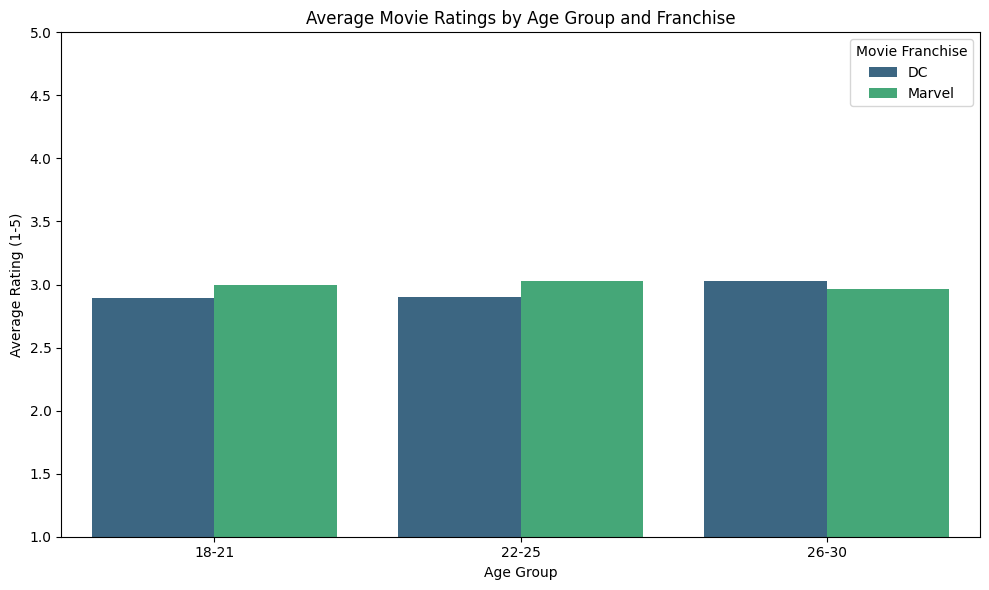

In [14]:
age_group_avg_ratings_df = age_group_average_ratings.reset_index()
age_group_avg_ratings_df.columns = ['Age_Group', 'Movie_Preference', 'Average_Rating']

plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_avg_ratings_df, x='Age_Group', y='Average_Rating', hue='Movie_Preference', palette='viridis')
plt.title('Average Movie Ratings by Age Group and Franchise')
plt.xlabel('Age Group')
plt.ylabel('Average Rating (1-5)')
plt.legend(title='Movie Franchise')
plt.ylim(1, 5) # Set y-axis limits to match rating scale
plt.tight_layout()
plt.show()

### Data Analysis Key Findings
*   **Overall Preference**: Marvel movies are preferred by 52.7% of young adults, compared to 47.3% for DC movies. Marvel also has a slightly higher overall average rating of 2.99, compared to DC's 2.95.
*   **Gender-based Preference**:
    *   Among females, the preference is almost evenly split (51.0% Marvel vs. 49.0% DC).
    *   Among males, Marvel holds a more significant lead (54.2% Marvel vs. 45.8% DC).
*   **Gender-based Ratings**:
    *   Female respondents rated Marvel movies higher on average (2.99) than DC movies (2.83).
    *   Male respondents, however, rated DC movies slightly higher on average (3.05) than Marvel movies (3.00).
*   **Age Group Preference**:
    *   The 18-21 age group shows an almost equal preference (50.3% Marvel vs. 49.7% DC).
    *   Preference for Marvel increases with age, reaching 53.2% in the 22-25 group and 54.2% in the 26-30 group.
*   **Age Group Ratings**:
    *   Marvel movies received higher average ratings in the younger age groups (18-21: 2.99 Marvel vs. 2.89 DC; 22-25: 3.03 Marvel vs. 2.90 DC).
    *   Conversely, DC movies received a slightly higher average rating (3.03) than Marvel movies (2.97) in the oldest age group (26-30).